In [1]:
%load_ext autoreload

import os,sys

import pandas as pd

import seaborn as sns

from matplotlib import cm

import ms_peak_picker

import scipy

import numpy as np

import progressbar

import dill as pickle

from datetime import datetime

import matplotlib as mpl

import matplotlib.pyplot as plt

import logging

from adjustText import adjust_text

import random



import math

from scipy.signal import argrelextrema

from collections import defaultdict


sys.path = ["/mnt/biocluster/projekte/merit_pimz/pyIMS/"] + sys.path



print(sys.path)



%autoreload 2

from pIMZ.regions import *

%autoreload 2

from pIMZ.imzml import *

%autoreload 2

from pIMZ.comparative import *

%autoreload 2

from pIMZ.clustering import *

%autoreload 2

from pIMZ.annotations import *

%autoreload 2

from pIMZ.differential import *

%autoreload 2

from pIMZ.enrichment import *

%autoreload 2

from pIMZ.similarity import *



import pIMZ

import pronto



plt.rcParams['figure.figsize'] = [10, 10]




numpy.core.multiarray failed to import
['/mnt/biocluster/projekte/merit_pimz/pyIMS/', '/mnt/raidbio/biocluster/projekte/merit_pimz/pyIMS/examples', '', '/mnt/biosoft/software/python/3.10/lib/python3.10/site-packages', '/mnt/biosoft/software/python/3.10/lib64/python3.10/site-packages', '/usr/lib64/python310.zip', '/usr/lib64/python3.10', '/usr/lib64/python3.10/lib-dynload', '/home/b/back/.local/lib/python3.10/site-packages', '/usr/lib64/python3.10/site-packages', '/usr/lib64/python3.10/_import_failed', '/usr/lib/python3.10/site-packages']


2023-04-25 20:56:03.382769: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


## Data import

In [2]:
# SpectraRegion contains mz values
spec = SpectraRegion.from_pickle("../../pimz/data_in/spec.pickle")

2023-04-25 20:56:12,735  SpectraRegion  INFO: Added new Stream Handler


In [5]:
# clusterings
scanpynorm = np.load("../../pimz/data_in/scanpynorm.npy")
clMetiter = np.load("../../pimz/data_in/clMetiter20k20r2.npy")
clMetKmeansiter = np.load("../../pimz/data_in/clMetKmeansiter20k20.npy")

## create similarity objects

In [3]:
spec_similarity = KsSimilarity(spec)

current_clustering = current_clustering+1,  as clustering contains 0
Current Iteration 0
Performing KS Analysis for iteration 0
Saving new clustering
Excluding Outliers


|##########################################################| 100% Time: 0:00:02


Identified 8000 of 8000 masses for processing.
method: <function ttest_ind at 0x7f589c1c1090>


|##########################################################| 100% Time: 0:10:19
/mnt/biocluster/projekte/merit_pimz/pyIMS/pIMZ/similarity.py:528: FutureWarning: Index.__and__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__and__.  Use index.intersection(other) instead.
  amount_of_occurence = self.cluster_am_normalization(len(ks_test[mass]), cluster_amount=cluster_amount)


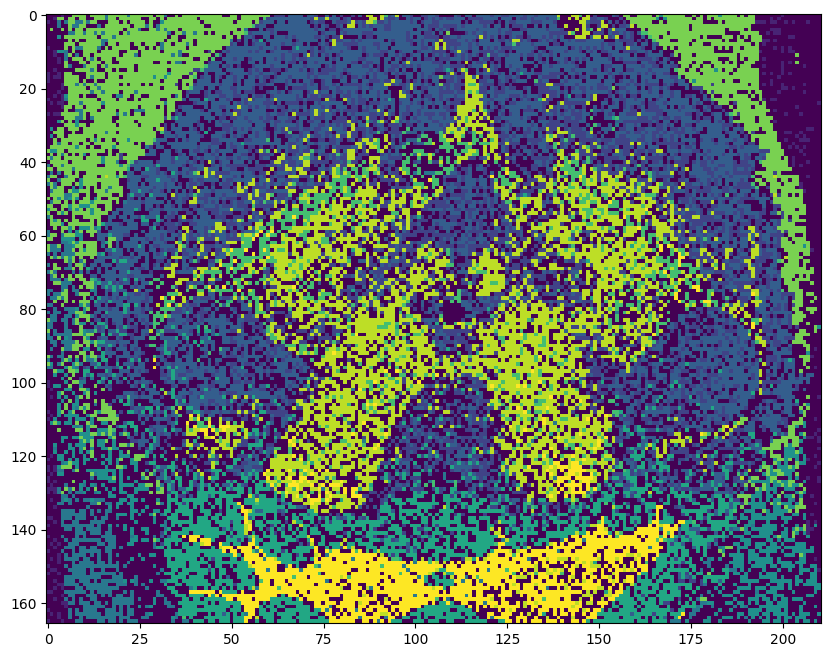

Equal pixels 23904
Equal pixels % 0.6824644549763034


array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 1., 0., ..., 0., 0., 5.],
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 5., 0.]])

In [24]:
spec_similarity.iterative_cluster_assignment(spec.meta["segmented"], th_t=20, a=0.0005, max_iteration=1)

In [8]:
spec_similarity.clusterwise_core_pixel[5]

[(0, 34),
 (0, 36),
 (0, 48),
 (0, 49),
 (0, 52),
 (0, 159),
 (0, 160),
 (0, 165),
 (0, 167),
 (0, 183),
 (0, 188),
 (1, 19),
 (1, 166),
 (1, 167),
 (1, 168),
 (1, 179),
 (2, 1),
 (2, 31),
 (2, 179),
 (4, 175),
 (5, 2),
 (5, 3),
 (5, 185),
 (6, 2),
 (6, 3),
 (6, 178),
 (6, 187),
 (7, 2),
 (7, 3),
 (7, 176),
 (7, 186),
 (8, 4),
 (8, 179),
 (9, 4),
 (9, 186),
 (10, 3),
 (10, 4),
 (10, 9),
 (10, 183),
 (10, 184),
 (10, 185),
 (11, 176),
 (11, 188),
 (12, 183),
 (13, 186),
 (14, 181),
 (14, 188),
 (14, 192),
 (15, 182),
 (15, 184),
 (15, 187),
 (16, 33),
 (16, 186),
 (17, 29),
 (17, 32),
 (18, 176),
 (18, 184),
 (18, 194),
 (21, 190),
 (21, 192),
 (22, 5),
 (22, 13),
 (22, 18),
 (22, 19),
 (22, 27),
 (22, 191),
 (22, 193),
 (23, 14),
 (23, 23),
 (23, 31),
 (23, 192),
 (23, 193),
 (24, 15),
 (24, 194),
 (25, 196),
 (27, 196),
 (29, 3),
 (29, 8),
 (29, 24),
 (29, 197),
 (30, 8),
 (30, 19),
 (31, 1),
 (32, 8),
 (33, 1),
 (34, 0),
 (34, 13),
 (34, 22),
 (34, 199),
 (35, 9),
 (35, 24),
 (36, 0)

In [9]:
spec_similarity.analysis_results

,mass_name,cluster_name,ks_value,p_value,rel_in_clusters,unique_for_cluster,p_value_adj,relevance_score
0,208,4.0,58.442774,5.622855e-87,"(4.0,)",True,5.715754e-87,0.745910
1,209,4.0,61.430699,1.341394e-89,"(4.0,)",True,1.387690e-89,0.751855
2,210,4.0,63.400188,1.455938e-86,"(4.0,)",True,1.476142e-86,0.755773
3,214,4.0,70.132443,2.846602e-89,"(4.0,)",True,2.934460e-89,0.769168
4,215,4.0,70.632711,3.838513e-94,"(4.0,)",True,4.178047e-94,0.770163
...,...,...,...,...,...,...,...,...
1164,7783,3.0,42.588172,8.534979e-110,"(3.0,)",True,1.104916e-109,0.714365
1165,7784,3.0,41.786462,1.499979e-104,"(3.0,)",True,1.822739e-104,0.712770
1166,7786,3.0,45.712631,2.353463e-104,"(3.0,)",True,2.856903e-104,0.720581
1167,7787,3.0,44.979752,1.836214e-99,"(3.0,)",True,2.102384e-99,0.719123


### In a range of 20 (default), of all identified masses, keep only the one with the highest score

In [10]:
spec_similarity.remove_similar_masses()

In [11]:
spec_similarity.analysis_results

,mass_name,cluster_name,ks_value,p_value,rel_in_clusters,unique_for_cluster,p_value_adj,relevance_score
4,215,4.0,70.632711,3.838513e-94,"(4.0,)",True,4.178047e-94,0.770163
11,286,1.0,94.687438,1.031983e-313,"(1.0,)",True,9.808031e-313,0.818024
23,298,1.0,69.551026,4.907681e-211,"(1.0,)",True,1.770703e-210,0.768011
46,321,1.0,53.452542,4.866985e-119,"(1.0,)",True,6.972433e-119,0.735981
50,393,4.0,85.479409,2.804937e-225,"(4.0,)",True,1.205504e-224,0.799703
...,...,...,...,...,...,...,...,...
1125,7704,9.0,50.524132,1.091270e-129,"(9.0,)",True,1.752327e-129,0.730155
1144,7735,2.0,55.678764,9.773214e-165,"(2.0,)",True,2.410314e-164,0.740410
1145,7738,2.0,69.497006,3.118068e-96,"(2.0,)",True,3.464849e-96,0.767904
1153,7768,3.0,45.207280,1.993876e-122,"(3.0,)",True,2.920854e-122,0.719576


### statistical evaluation of how well a mass describes a cluster 

In [12]:
# adding to analysis results: sensitivity specificity	false_neg_rate	false_pos_rate
spec_similarity.statistics_of_mass(add_to_df=True, for_all=True)

adding statistics for masses to results df


/mnt/biocluster/projekte/merit_pimz/pyIMS/pIMZ/similarity.py:756: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.analysis_results['sensitivity'] = "NaN"
/mnt/biocluster/projekte/merit_pimz/pyIMS/pIMZ/similarity.py:758: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.analysis_results['specificity'] = "NaN"
/mnt/biocluster/projekte/merit_pimz/pyIMS/pIMZ/similarity.py:760: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] 

In [13]:
spec_similarity.analysis_results

,mass_name,cluster_name,ks_value,p_value,rel_in_clusters,unique_for_cluster,p_value_adj,relevance_score,sensitivity,specificity,false_neg_rate,false_pos_rate
4,215,4.0,70.632711,3.838513e-94,"(4.0,)",True,4.178047e-94,0.770163,0.90013,0.764618,0.09987,0.235382
11,286,1.0,94.687438,1.031983e-313,"(1.0,)",True,9.808031e-313,0.818024,0.956938,0.754229,0.043062,0.245771
23,298,1.0,69.551026,4.907681e-211,"(1.0,)",True,1.770703e-210,0.768011,0.875598,0.753741,0.124402,0.246259
46,321,1.0,53.452542,4.866985e-119,"(1.0,)",True,6.972433e-119,0.735981,0.799043,0.753281,0.200957,0.246719
50,393,4.0,85.479409,2.804937e-225,"(4.0,)",True,1.205504e-224,0.799703,0.964981,0.766078,0.035019,0.233922
...,...,...,...,...,...,...,...,...,...,...,...,...
1125,7704,9.0,50.524132,1.091270e-129,"(9.0,)",True,1.752327e-129,0.730155,0.772045,0.819729,0.227955,0.180271
1144,7735,2.0,55.678764,9.773214e-165,"(2.0,)",True,2.410314e-164,0.740410,0.605217,0.803688,0.394783,0.196312
1145,7738,2.0,69.497006,3.118068e-96,"(2.0,)",True,3.464849e-96,0.767904,0.607609,0.804049,0.392391,0.195951
1153,7768,3.0,45.207280,1.993876e-122,"(3.0,)",True,2.920854e-122,0.719576,0.543164,0.805715,0.456836,0.194285


### evaluate how many masses where found per cluster

In [14]:
found_masses_for_cluster = spec_similarity.found_masses_for_cluster()

In [15]:
for x in list(found_masses_for_cluster.keys()):
    print(f"cluster: {x}, amount of found masses: {found_masses_for_cluster[x][0]}") 

cluster: 1.0, amount of found masses: 13
cluster: 2.0, amount of found masses: 31
cluster: 3.0, amount of found masses: 18
cluster: 4.0, amount of found masses: 10
cluster: 5.0, amount of found masses: 27
cluster: 6.0, amount of found masses: 5
cluster: 7.0, amount of found masses: 10
cluster: 8.0, amount of found masses: 7
cluster: 9.0, amount of found masses: 8
cluster: 10.0, amount of found masses: 6


### avg sensitivity and specitivity over all identified masses per cluster

In [16]:
spec_similarity.statistics_of_cluster()

{1.0: {0.7537984318005573, 0.8851674641148326},
 2.0: {0.6688639551192145, 0.8133101358557943},
 3.0: {0.6939926521695958, 0.8343885321222142},
 4.0: {0.764612465333528, 0.8998702983138781},
 5.0: {0.7647290147290146, 0.8514982763192789},
 6.0: {0.783375742154368, 0.7884841435043468},
 7.0: {0.7725669225980495, 0.8391337973704562},
 8.0: {0.8000686368976123, 0.8859712833119169},
 9.0: {0.7641109496124032, 0.8186694931710792},
 10.0: {0.7784549809287643, 0.862808145766345}}

### determine connetced cluster size

In [17]:
# testing inital cluster
amount_cc, avg_cl_size, size_count = spec_similarity.connected_cluster_size()

In [18]:
# testing calculated cluster
amount_cc_2, avg_cl_size_2, size_count2 = spec_similarity.connected_cluster_size(test_clustering="core")

### core pixel per cluster: {cluster: (total count of core pixels, share of all pixel, that are core)}

In [19]:
spec_similarity.core_pixel_per_cluster()

{1.0: (209, 0.16163959783449341),
 2.0: (4600, 0.7631055076310551),
 3.0: (5595, 0.8060798155885319),
 4.0: (771, 0.5266393442622951),
 5.0: (838, 0.4264631043256997),
 6.0: (2358, 0.5307224848075625),
 7.0: (1293, 0.5288343558282208),
 8.0: (2557, 0.8529019346230821),
 9.0: (4128, 0.7757940236797595),
 10.0: (1555, 0.730733082706767)}

## analysis of 2nd clustering

|                                                         |   0% ETA:  --:--:--
|#                                                        |   2% ETA:  00:00:00
|##                                                       |   5% ETA:   0:00:02
|####                                                     |   7% ETA:   0:00:02


Current Iteration 0
Performing KS Analysis for iteration 0
Saving new clustering
Excluding Outliers


|#####                                                    |  10% ETA:   0:00:01
|#######                                                  |  12% ETA:   0:00:01
|########                                                 |  15% ETA:   0:00:01
|##########                                               |  17% ETA:   0:00:01
|###########                                              |  20% ETA:   0:00:01
|############                                             |  22% ETA:   0:00:01
|##############                                           |  25% ETA:   0:00:01
|###############                                          |  27% ETA:   0:00:01
|#################                                        |  30% ETA:   0:00:01
|##################                                       |  32% ETA:   0:00:01
|####################                                     |  35% ETA:   0:00:01
|#####################                                    |  37% ETA:   0:00:01
|#######################                

Identified 8000 of 8000 masses for processing.
method: <function ttest_ind at 0x7f2035f7f760>
in loky


/mnt/biocluster/projekte/merit_pimz/pyIMS/pIMZ/similarity.py:536: FutureWarning: Index.__and__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__and__.  Use index.intersection(other) instead.
  idx = self.analysis_results.index[(self.analysis_results['mass_name']==mass)] & self.analysis_results.index[(self.analysis_results['cluster_name']==c)]


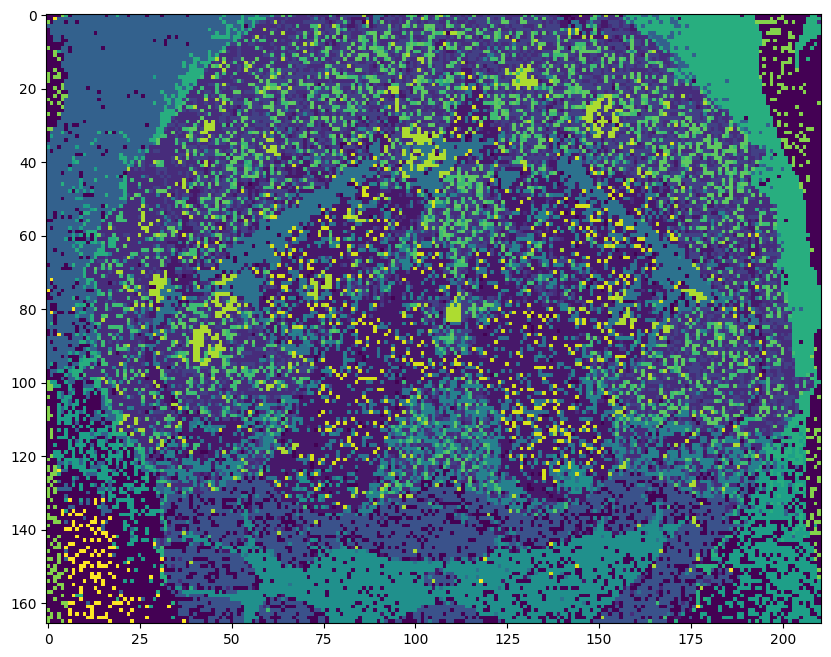

Equal pixels 30858
Equal pixels % 0.8810026837206647
adding statistics for masses to results df


/mnt/biocluster/projekte/merit_pimz/pyIMS/pIMZ/similarity.py:799: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.analysis_results['sensitivity'][ind] = sensitivity
/mnt/biocluster/projekte/merit_pimz/pyIMS/pIMZ/similarity.py:800: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.analysis_results['specificity'][ind] = specificity
/mnt/biocluster/projekte/merit_pimz/pyIMS/pIMZ/similarity.py:801: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-

In [20]:
spec_similarity_scanpynorm = KsSimilarity(spec)
spec_similarity_scanpynorm.iterative_cluster_assignment(scanpynorm, th_t=20, a=0.0005, max_iteration=1)
spec_similarity_scanpynorm.remove_similar_masses()
spec_similarity_scanpynorm.statistics_of_mass()

In [21]:
spec_similarity_scanpynorm.analysis_results

,mass_name,cluster_name,ks_value,p_value,rel_in_clusters,unique_for_cluster,p_value_adj,relevance_score,sensitivity,specificity,false_neg_rate,false_pos_rate
1,90,5,80.823297,2.013885e-163,"(5,)",True,9.191030e-163,0.813246,0.931798,0.796967,0.068202,0.203033
7,215,16,69.506775,2.354225e-134,"(16,)",True,7.651232e-134,0.789611,0.950704,0.752838,0.049296,0.247162
14,286,13,77.523452,4.229646e-183,"(13,)",True,2.880188e-182,0.806354,0.973978,0.755589,0.026022,0.244411
27,299,13,54.344865,2.459638e-108,"(13,)",True,4.414998e-108,0.757945,0.847584,0.754611,0.152416,0.245389
36,394,16,65.216953,1.878745e-216,"(16,)",True,2.599940e-215,0.780652,0.93662,0.752781,0.06338,0.247219
...,...,...,...,...,...,...,...,...,...,...,...,...
410,7372,4,38.926041,1.761438e-88,"(4,)",True,1.983351e-88,0.725743,0.740451,0.782425,0.259549,0.217575
412,7438,4,71.995721,9.086035e-291,"(4,)",True,1.771777e-289,0.794810,0.956282,0.7967,0.043718,0.2033
413,7441,4,47.947574,1.903471e-146,"(4,)",True,7.226450e-146,0.744584,0.807179,0.786838,0.192821,0.213162
415,7698,15,44.853731,1.726573e-93,"(15,)",True,2.191420e-93,0.738123,0.887439,0.76134,0.112561,0.23866


## comparison of clusterings

In [22]:
compare_clusterings_for_data({"spec.meta['segmented']":spec_similarity, "scanpynorm": spec_similarity_scanpynorm})

,cluster_KsSimilarity,clusterID,amount_found_masses,amount_connencted_cluster,avg_size_cc,share_core_pixel,density
0,spec.meta['segmented'],1.0,13,4239,8.262798,1293,0.908589
1,spec.meta['segmented'],2.0,31,4239,8.262798,6028,0.426519
2,spec.meta['segmented'],3.0,18,4239,8.262798,6941,0.556948
3,spec.meta['segmented'],4.0,10,4239,8.262798,1464,0.619232
4,spec.meta['segmented'],5.0,27,4239,8.262798,1965,0.769296
5,spec.meta['segmented'],6.0,5,4239,8.262798,4443,0.582302
6,spec.meta['segmented'],7.0,10,4239,8.262798,2445,0.399455
7,spec.meta['segmented'],8.0,7,4239,8.262798,2998,0.766103
8,spec.meta['segmented'],9.0,8,4239,8.262798,5321,0.551922
9,spec.meta['segmented'],10.0,6,4239,8.262798,2128,0.729402


### plotting density

{1.0: 0.9085889834149695,
 8.0: 0.7661033281446891,
 4.0: 0.6192319368548876,
 5.0: 0.7692960135708227,
 9.0: 0.5519221533128693,
 2.0: 0.42651883801518836,
 3.0: 0.5569482463301798,
 6.0: 0.5823017480681222,
 7.0: 0.3994546693933197,
 10.0: 0.7294016290726817}

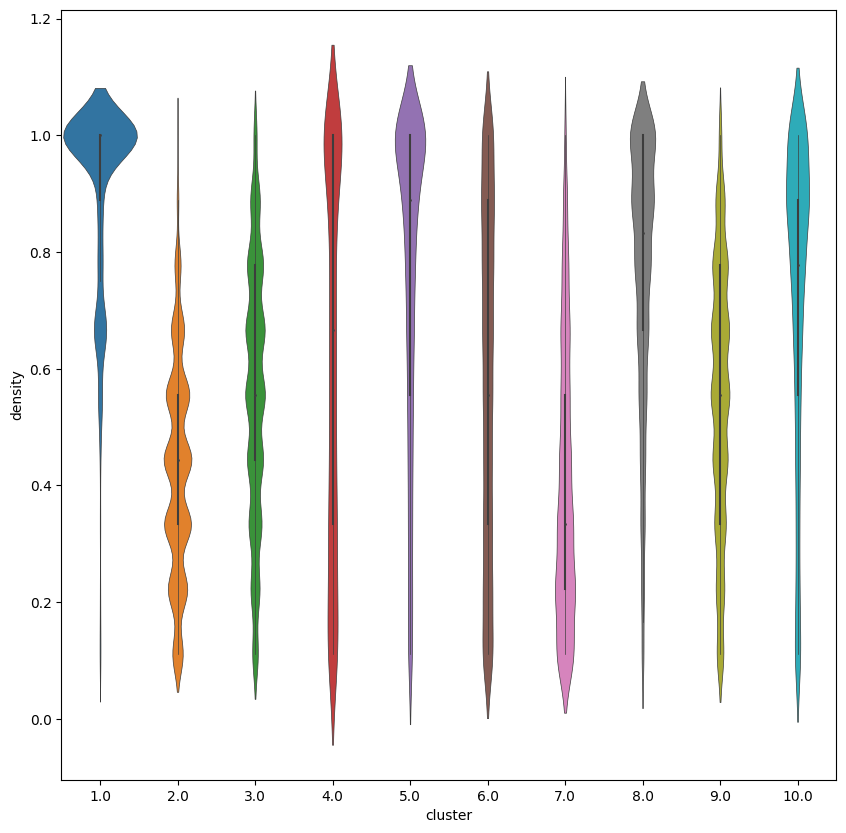

In [41]:
spec_similarity.density(radius=1, circular=False, plotting=True)

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

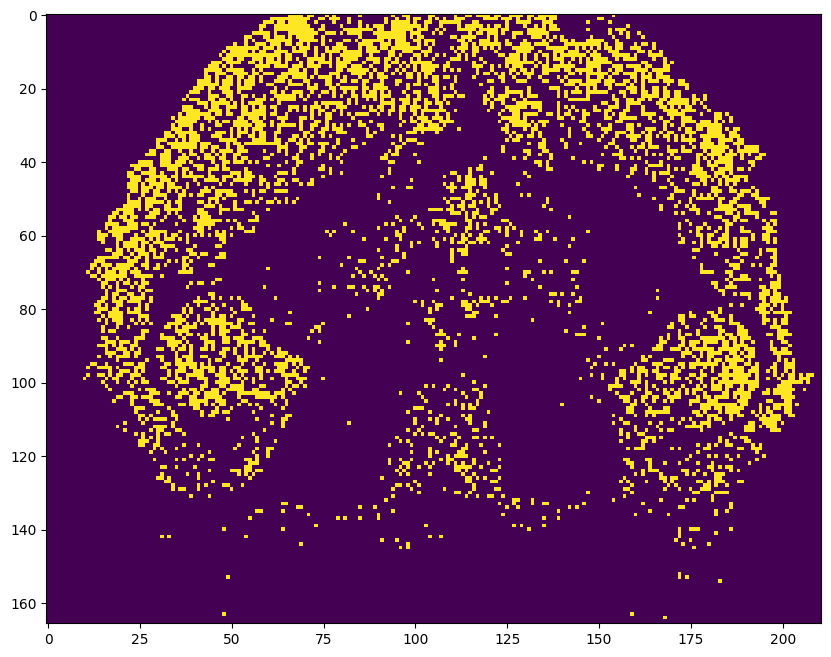

In [44]:
show_one_cluster(spec_similarity.clustering, 3, show=True)# 3 is 4

### mass, contour cluster
 

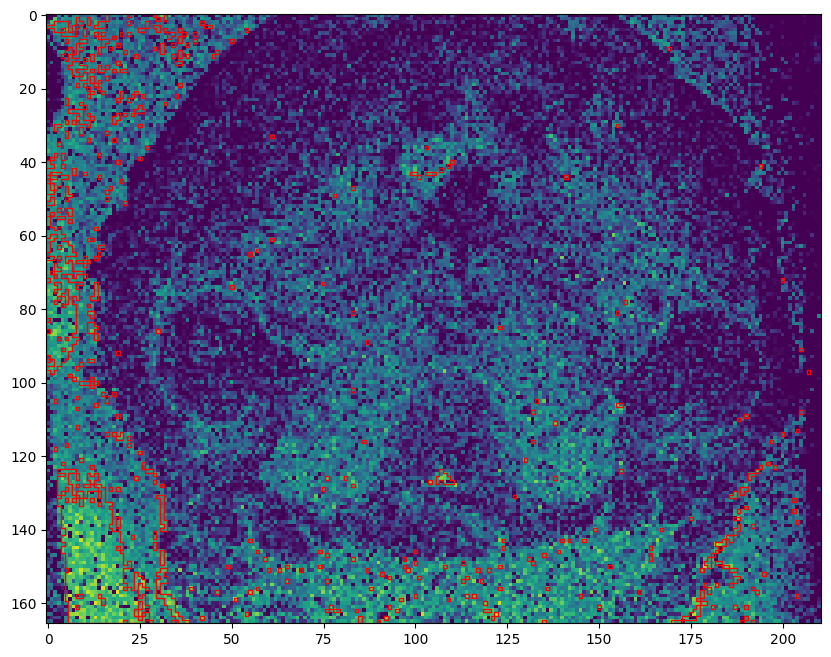

In [23]:
spec_similarity.plot_mass_with_contours(215, 4)

### check mass for cluster

--- SUMMARY FOR mass 215 and cluster 4.0 -----------

--- UNIQUENES & RELEVANCE --------------------------
this mass is unique for this cluster
relevance score: 0.7702

--- TEST RESULTS -----------------------------------
statistical value: 70.6327
p value: 0.0
adjusted p value: 0.0

--- STATISTCAL EVALUATION --------------------------
sensitivity: 0.9001
specificity: 0.7646
false negative rate: 0.0999
false positive rate: 0.2354

----------------------------------------------------


{'mass_name': 215,
 'cluster_name': 4.0,
 'ks_value': 70.6327105555857,
 'p_value': 3.8385134616170016e-94,
 'rel_in_clusters': (4.0,),
 'unique_for_cluster': True,
 'p_value_adj': 4.178046775260963e-94,
 'relevance_score': 0.7701634406361996,
 'sensitivity': 0.9001297016861219,
 'specificity': 0.7646183038972413,
 'false_neg_rate': 0.09987029831387809,
 'false_pos_rate': 0.23538169610275872}

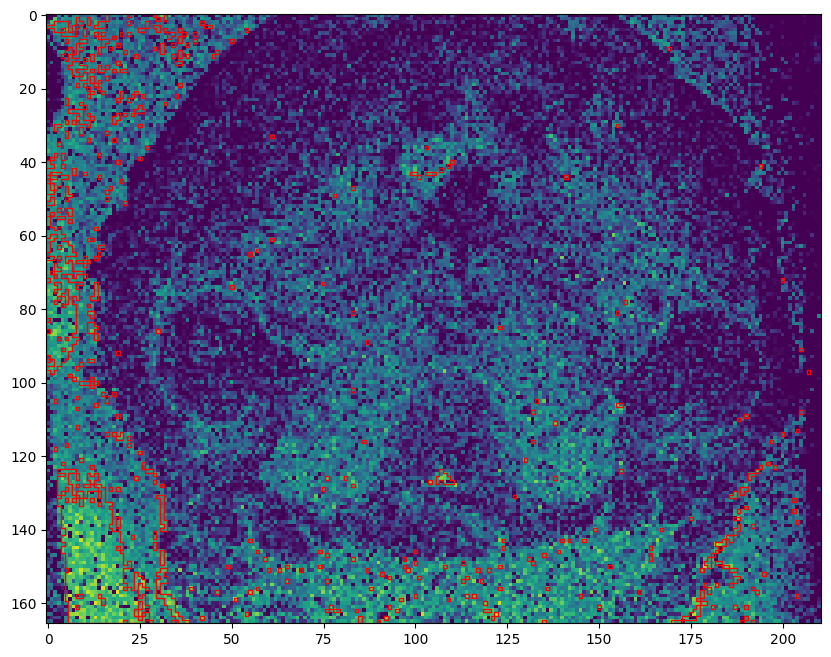

In [22]:
spec_similarity.check_mass_for_cluster(215,4)

mass 215 was not identified as characteristic for cluster 3


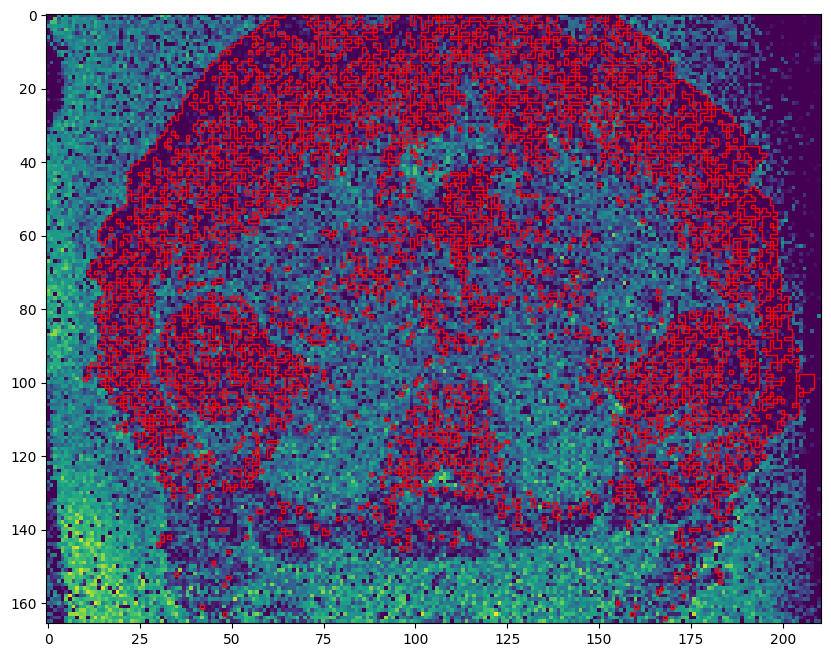

In [23]:
spec_similarity.check_mass_for_cluster(215,3)

### core pixel clustering
for each pixel, compute mean similarity to 100 sampled core pixels for each cluster

core_pixel_clustering chooses highest value



In [24]:
spec_similarity.compute_core_pixel_similarity_clustering()

|                                                         |   0% ETA:  --:--:--
|                                                         |   0% ETA:   0:05:31
|                                                         |   1% ETA:   0:05:37
|#                                                        |   1% ETA:   0:05:22
|#                                                        |   2% ETA:   0:05:01
|#                                                        |   3% ETA:   0:05:06
|##                                                       |   3% ETA:   0:05:18
|##                                                       |   4% ETA:   0:05:05
|##                                                       |   4% ETA:   0:04:56
|###                                                      |   5% ETA:   0:04:45
|###                                                      |   6% ETA:   0:05:20
|###                                                      |   6% ETA:   0:05:10
|####                                   

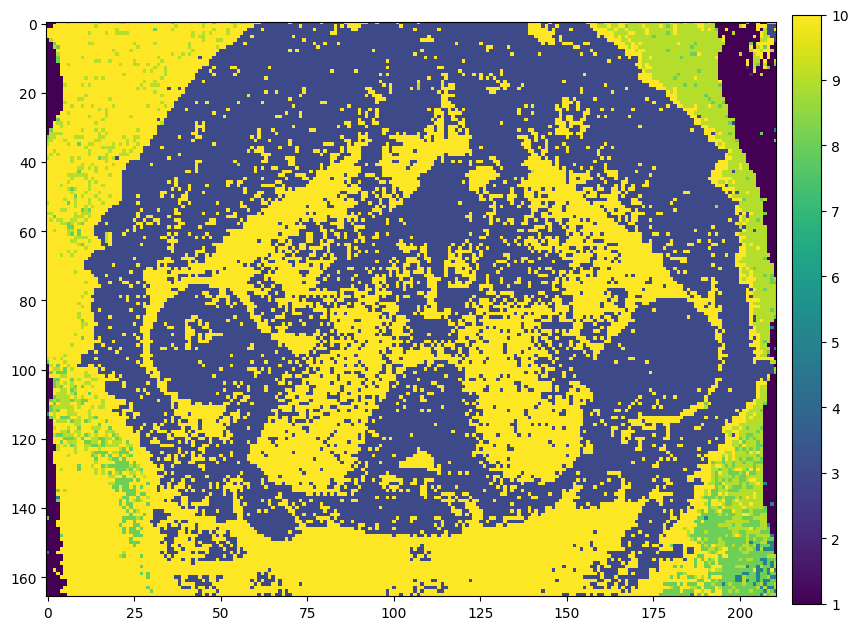

In [25]:
plt.imshow(spec_similarity.core_similarity_clustering)
plt.colorbar(fraction=0.038, pad=0.02)
plt.show()

In [26]:
spec_similarity.core_similarity_dict

defaultdict(<function pIMZ.similarity.KsSimilarity.compute_core_pixel_similarity_clustering.<locals>.<lambda>()>,
            {(0,
              0): defaultdict(list,
                         {1: [706.7069516332425],
                          2: [454.33825721495896],
                          3: [355.6914368983625],
                          4: [360.5237885705709],
                          5: [343.7973096241172],
                          6: [315.61145444818817],
                          7: [327.8720197673881],
                          8: [332.91535764315125],
                          9: [330.23382068867414],
                          10: [330.25249611046365]}),
             (0,
              1): defaultdict(list,
                         {1: [918.3304728446813],
                          2: [686.5045658760198],
                          3: [589.9541735134932],
                          4: [686.4897231229548],
                          5: [705.5732284904842],
                      

### create filled out clustering from core pixels (=KsSimilarity.clustering)

In [33]:
spec_similarity.fill_core_pixels()

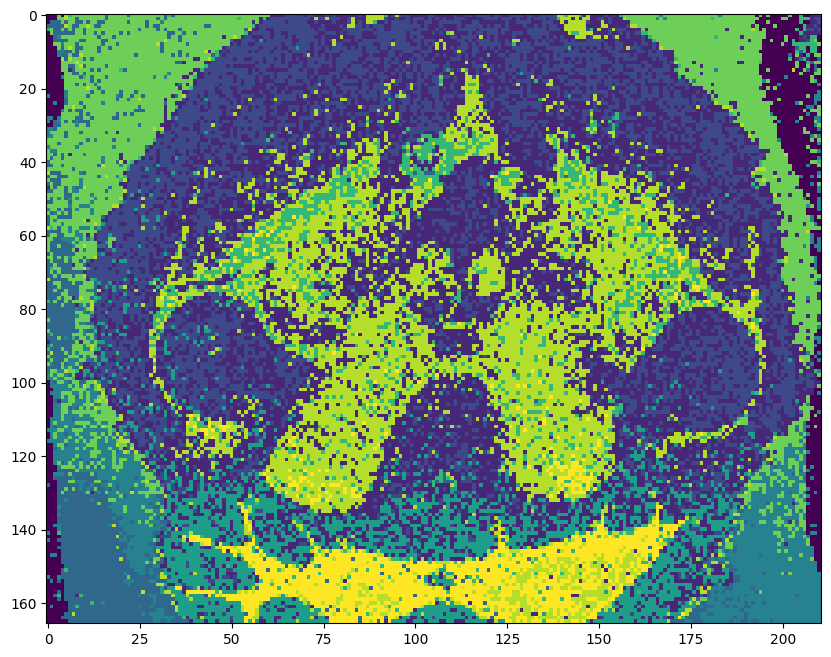

In [ ]:
plt.imshow(spec_similarity.filled_clustering)

In [34]:
amount_cc_filled, avg_cl_size_filled, size_countfilled = spec_similarity.connected_cluster_size(test_clustering="filled")

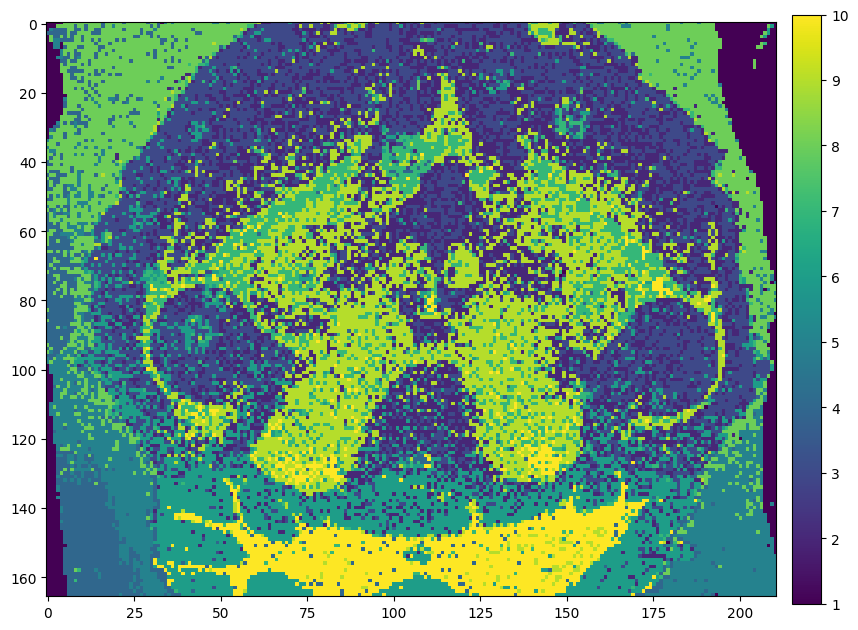

In [35]:
plt.imshow(spec_similarity.initial_clustering)
plt.colorbar(fraction=0.038, pad=0.02)
plt.show()

### homogeneity (not useful due to cluster shape)

In [ ]:
summary, distances = homogeneity(spec_similarity.initial_clustering)

In [ ]:
summary
# L(3*std) should be higher.. not functioning well, because shape is not circle like?
# homogene data: value should be close to t = 3*cl_std (cl_std is the standard diviation of the distances from the centroid)

{1.0: {'centroid': (60.078112915699705, 149.9481825212683),
  'mean': 95.6391084898527,
  'std': 43.14001483487573,
  'L(3*std)': 2.5103698753054062},
 8.0: {'centroid': (38.40827218145447, 87.48799199466306),
  'mean': 89.2096949734919,
  'std': 23.472018244474075,
  'L(3*std)': 0.9331624676157952},
 4.0: {'centroid': (110.3176229508196, 31.80874316939889),
  'mean': 62.157605702978564,
  'std': 35.39245504216842,
  'L(3*std)': 2.58843456210453},
 5.0: {'centroid': (126.93944020356237, 109.55267175572511),
  'mean': 96.40328929890524,
  'std': 14.736412003678925,
  'L(3*std)': 0.05373506525460188},
 9.0: {'centroid': (82.20823153542548, 111.0340161623755),
  'mean': 45.648100143780276,
  'std': 19.847783111152573,
  'L(3*std)': 1.2706297068369516},
 2.0: {'centroid': (67.14283344392831, 115.82266091572659),
  'mean': 57.57333419915663,
  'std': 22.4655575553585,
  'L(3*std)': 1.083618280192824},
 3.0: {'centroid': (59.10416366517768, 107.01008500216118),
  'mean': 65.79934372579939,
 

In [ ]:
distances.keys()

dict_keys([1.0, 8.0, 4.0, 5.0, 9.0, 2.0, 3.0, 6.0, 7.0, 10.0])

## plotting distances

In [ ]:
def plot_cluster_dist(clusters):
    cluster_list = []
    distance_list = []
    for cluster in clusters:
        for d in distances[cluster]:
            cluster_list.append(cluster)
            distance_list.append(d)
    distance_to_plot = pd.DataFrame({"cluster":cluster_list, "distance":distance_list})
    sns.histplot(data=distance_to_plot, x="distance", hue="cluster", element="step", fill=False,palette="tab10")


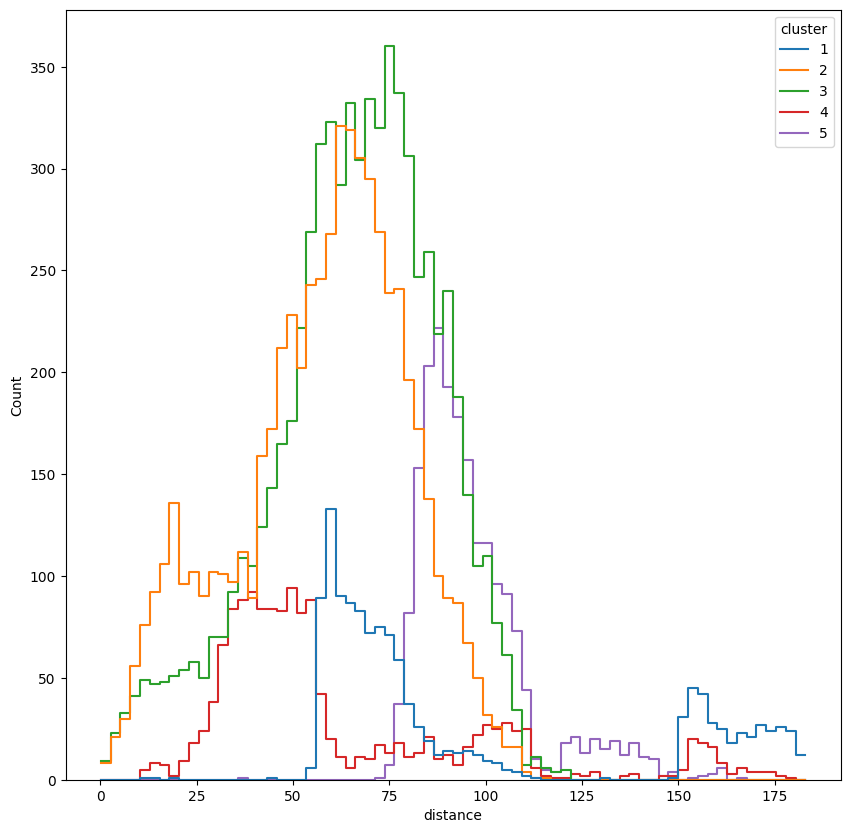

In [ ]:
plot_cluster_dist([1,2,3,4,5])

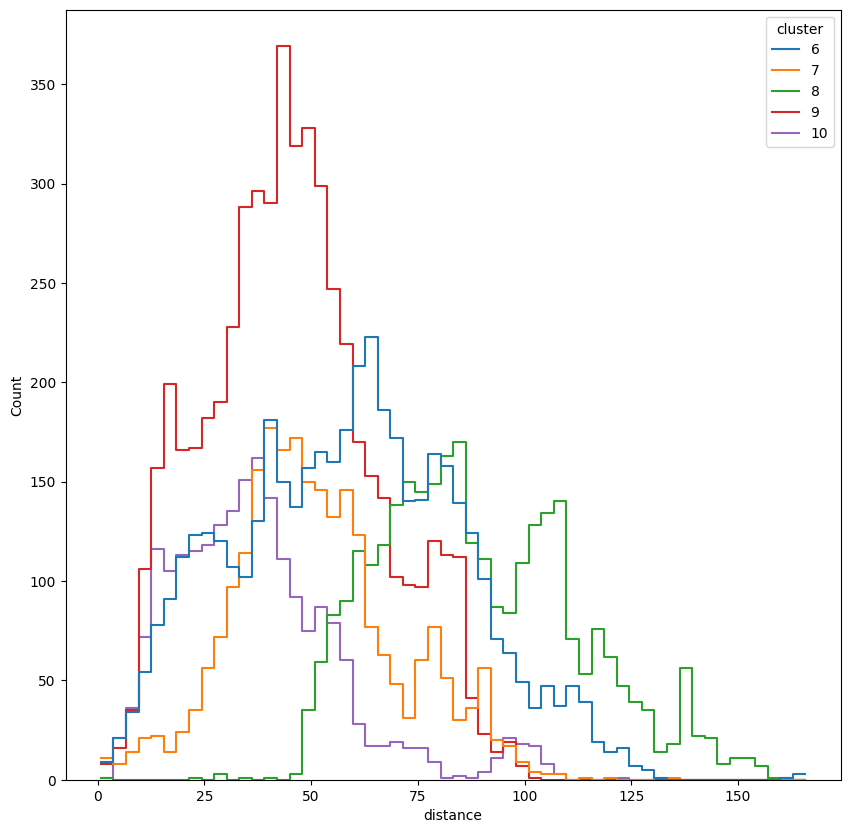

In [ ]:
plot_cluster_dist([6,7,8,9,10])

# workflow analysis
read data
normalize
cluster -> multiple data as input, same clustering (kmeans spalte ist samplename und pixel statt pixel)
how good are clusterings?
differential comparison
annotate found masses
performance problem? use less masses (2000 instead of 6000) highly variable masses